In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MURA

In [2]:
import sys
sys.path.append("../../fastai/")

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix

In [4]:
#PATH = "/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/"  #MMIV
PATH = "/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/" #Home

In [5]:
os.listdir(PATH)

['valid.csv',
 '.DS_Store',
 'test_submission_example.csv',
 'MURA-v1.0',
 'train.csv']

In [6]:
df_train = pd.read_csv(f'{PATH}train.csv')
df_valid = pd.read_csv(f'{PATH}valid.csv')

In [7]:
df_train.head()

,MURA-v1.0/train/XR_SHOULDER/patient00001/study1_positive/image1.png,1
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [8]:
df_train.columns = ['Image Index', 'Abnormality']

In [9]:
df_valid.columns = ['Image Index', 'Abnormality']

In [10]:
df_train.shape, df_valid.shape

((37110, 2), (3224, 2))

In [11]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,Image Index,Abnormality
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [12]:
df.shape

(40334, 2)

In [13]:
df['Abnormality'] = df['Abnormality'].astype('bool')

In [14]:
val_idxs = np.array(range(len(df_train), len(df)))

In [15]:
cleaned_label_path = f'{PATH}cleaned_label.csv'
df.to_csv(cleaned_label_path, index=False)

# View data

In [16]:
sz = 64
arch = dn169
bs = 16

In [25]:
??ImageClassifierData.from_csv()

In [30]:
def get_data(sz): 
    tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip())  
    return ImageClassifierData.from_csv(PATH ,'', cleaned_label_path , test_name='MURA-v1.0/train',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs);

In [31]:
data = get_data(sz)

In [32]:
fn = PATH+data.trn_ds.fnames[10]
fn 

'/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/MURA-v1.0/train/XR_ELBOW/patient00032/study1_negative/image2.png'

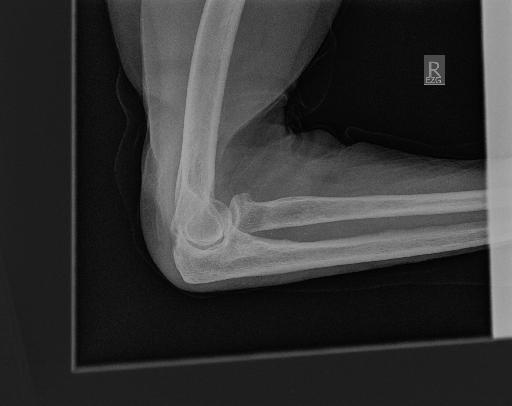

In [33]:
img = PIL.Image.open(fn);
img

In [21]:
data.trn_ds.fnames.shape ,data.val_ds.fnames.shape

((37110,), (3224,))

# Training

In [22]:
learn = ConvLearner.pretrained(arch, data, ps = 0.5)

In [23]:
lr = 0.00008